<h1>Análisis de problemas en grafos</h1>

<h2>En el siguiente documento se abordarán soluciones a tres tipos de problemas diferentes que pueden ser representados mediante el uso de grafos, en relación con Distribución de Nodos, Cliques en Grafos y Árboles de Expansión.</h2>

$1.$ <b>Suponga que se planea contruir una nueva cadena de tiendas en una ciudad dada, usted tiene identificado una serie de ubicaciones potenciales en diferentes barrios. Además asuma que la demanda de productos en cada barrio de la ciudad es conocida. Si usted quiere construir exactamente k tiendas,  ¿dónde debería localizarlas de forma que minimice la distancia promedio de los clientes? ¿Si en lugar usted dese construir una cantidad variable de tiendas, y el costo de construir una tienda en cada sitio es conocido, ¿dónde debería construir las tiendas de forma que minimice el costo total del construcción y la distancia promedio de los clientes?</b>

La primera parte del enunciado solicita crear $n$ cantidad de tiendas. Este algoritmo se basa en dos partes importantes, la primera es del uso de un algoritmo de "Distancia más corta" puede ser Dijkstra o FloydWarshall, en este caso, se vió mucho más coodo hacerlo por Warshall, la segunda es el cálculo de los nodos más factibles a crear la nueva tienda, se usa la libreria numpy para el manejo de matrices, en resumen el código primero calcula las menores distancias entre cada par de nodos, una vez sean obtenidas realiza la sumatoria horizontal por cada nodo y en el menor costo, será la primera localización de la tienda, el proceso es iterativo y se repite la cantidad de veces que se desee contruir una nueva tienda, una vez se asigna un nodo, este no se tiene en cuenta para una nueva asignación, con la diferencia que los valores de la matriz varían por las nuevas tiendas construidas para atender la demanda.

In [1]:
#Librerías utilizadas
import numpy as np
import re
import os.path
import time

In [2]:
#Algoritmo para hallar la distancia mas corta entre cada par de nodos
def FloydWarshall(W):
    n = W.shape[0]
    D_list = []#Save each D^{(k)} matrix
    D_list.append(W[:,:])#D^{(0)}
    for k in range(n):        
        D_k = D_list[k][:,:]
        for i in range(n):
            for j in range(n):
                D_k[i,j] = min(D_list[k][i,j], D_list[k][i,k]+D_list[k][k,j])        
        D_list.append(np.copy(D_k))
        
    return D_k

In [3]:
#Función que recibe como parámetros la matriz de costos (mat), una lista de nodos con tiendas (add), 
#numero de la columna actual evaluada (col)
#La funcion busca y retorna el costo mínimo en la matriz de costos entre un nodo con los demás
def minVal(mat, add, col):
    res = float("inf")
    for i in range(len(add)):
        if(mat[add[i],col] < res):
            res = mat[add[i],col]
    
    return res

In [4]:
#Función que recibe como parámetros un vector de nodos con tiendas (add) y un vector con los nombres de los nodos (names)
#La función retorna una lista con los nombres de los nodos a crear nuevas tiendas
def names(add, names):
    namesAdd = []
    for i in range(len(add)):
        namesAdd.append(names[add[i]])
        
    return namesAdd

In [112]:
#Función que recibe como parámetros, la matriz final de costos (mat) y un arreglo con las posiciones de los nodos asignados 
#(add).
#La función retorna la distancia promedio de los nodos no asignados.
def averageDistance(mat, add):
    allP =  range(len(mat))
    notAssign = [i for i in allP if i not in add ]
    dist = 0;
    for i in notAssign:
        dist += min(list(set(mat[i]) - set([mat[i][i]])))/len(notAssign)
        
    return dist

In [115]:
#Función que recibe como parámetros la matriz de costos (mat), una lista con la demanda de cada nodo (dem) y 
#un número de tiendas a construir (nPlants)
#La función una vez obtiene los costos de distancia y demanda en general busca los valores mínimos y asigna las tiendas a los 
#nodos
def addNPlants(mat, dem, nPlants):
    add = [] #Vector donde almacena las tiendas asignadas
    mat = FloydWarshall(mat) #Llamado a Warshall para obtener distancias
    for i in range(len(mat)):
        mat[:,i]*=dem[i] #Inclusion de la demanda a cada nodo
    
    for i in range(nPlants):
        if (len(add) > 0) and (l not in add):
            mat2 = mat
            for j in range(np.shape(mat)[0]):
                for k in range(np.shape(mat)[1]):
                    mat2[j,k] = min(minVal(mat,add,k), mat[j,k]) #Actualiza costos de distancia y demanda dependiendo de 
                                                                 #las nuevas tiendas asignadas en iteraciones anteriores
        cmin = float("inf")
        for l in range(np.shape(mat)[0]):
            if l not in add:
                temp = min(cmin, sum(mat[l])) #Selecciona el costo mínimo de toda la matriz actualizada para seleccionar 
                                              #el nuevo nodo para la creación de una nueva tienda
                if temp < cmin:
                    cmin = temp
                    row = l
        add.append(row)
        
    avgDistance = averageDistance(matOrigin, add)    
    return add, avgDistance

En el segundo requerimiento del enunciado se solicita crear una cantidad de tiendas desconoida que debe hallar el algoritmo minimizando costos de construccion y minimizando la distancia promedio general. El procedimiento es prácticamente igual al anterior, con la variacion de que ahora se tiene en cuenta el costo de construcción y que el algoritmo termina cuando al insertar una nueva tienda, en vez de minimizar costos, se aumentan con respecto a iteraciones anteriores

In [6]:
#Función que recibe como parámetros una lista de tiendas asignadas (add) y una lista de costos de construcción (cc)
#La función retorna el acumulado de costos de construccion para cada nodo producto de la creación de tiendas anteriores
def accumCost(add, cc):
    suma = 0
    for i in range(len(add)):
        suma += cc[add[i]]
    
    return suma

In [7]:
#Función que recibe como parámetros la matriz de costos (mat), una lista con la demanda de cada nodo (dem) y 
#una lista con los costos de construcción de cada tienda (cc)
#La función una vez obtiene los costos de distancia y demanda en general busca los valores mínimos teniendo 
#en cuenta los costos de contrucción y asigna las tiendas a los nodos
def addAllPlants(mat, dem, cc, nPlants):
    add = [] #Vector donde almacena las tiendas asignadas
    mat = FloydWarshall(mat) #Llamado a Warshall para obtener distancias
    for i in range(len(mat)):
        mat[:,i]*=dem[i] #Inclusion de la demanda a cada nodo
    
    fwd = True
    last = float("inf")
    totalCost = 0 #Contador de costo total
    while fwd:
        if (len(add) > 0) and (l not in add):
            mat2 = mat
            for j in range(np.shape(mat)[0]):
                for k in range(np.shape(mat)[1]):
                    mat2[j,k] = min(minVal(mat,add,k), mat[j,k]) #Actualiza costos de distancia y demanda dependiendo de 
                                                                 #las nuevas tiendas asignadas en iteraciones anteriores

        cmin = float("inf")
        for l in range(np.shape(mat)[0]):
            if l not in add:
                temp = min(cmin, sum(mat[l])+accumCost(add,cc)+cc[l]) #Selecciona el costo mínimo de toda la matriz actualizada 
                                                                      #teniendo en cuenta el costo de construcción del nodo y el 
                                                                      #acumulado para seleccionar el nuevo nodo para la creación
                                                                      #de una nueva tienda
                if temp < cmin:
                    cmin = temp
                    row = l
        if cmin > last or len(add) == nPlants:
            fwd = False
        else:
            add.append(row)
            last = cmin
            totalCost += cmin #Aumento costo total
            
    return add, totalCost

In [8]:
#Función que recibe como parámetros una lista de lineas escaneadas en el archivo de texto (lines), una lista con 
#los valores de la demanda (dem) y una opción para el caso que se incluyan o no costos de construcción (option), esta función se
#encarga de tokenizar cada linea y organizar la información de la manera adecuada para posteriormente llamar a la función de ADD
#Retorna la lista de nodos a construir tiendas y los nombres de todos los nodos
def fillData(lines, dem, option):
    nPlants = int(lines[0]) #Número de tiendas a construir
    mat = [] #Matriz de adyacencia
    cc = [] #lista de costos
    nameNodes = [] #Lista de nombres de los nodos
    for l in lines[1:]: #Lectura y tokenización de cada linea del archivo de texto
        lSplit = re.split(r'\t+', l)
        nameNodes.append(lSplit[0])
        lSplit.pop(0)
        if option == "_c":
            cc.append(lSplit[0])
            lSplit.pop(0)
        if len(mat) == 0:
            mat = np.matrix([float(i) for i in lSplit])
        else:
            mat = np.concatenate((mat, np.matrix([float(i) for i in lSplit])), axis=0)
            
    if option == "_c": 
        cc = [float(i) for i in cc]
        res = addAllPlants(mat, dem, cc, nPlants)
    else:
        res = addNPlants(mat, dem, nPlants)
    
    return res, nameNodes

In [9]:
#Lectura del archivo
def readFile(textFile):
    try:
        infile = open(textFile, 'r')
        lines = []
        for line in infile:
            lines.append(re.split(r'\n+', line)[0])
        infile.close()
        
        return lines
    except IOError:
        print "Verifique que el nombre y ubicación del archivo!"

In [10]:
#Inicio del programa
file_name = "lp_facilitylocation\input_n5_k3_c" #Nombre del archivo input
lines = readFile(file_name)
dem = np.ones(4) #Lista de demanda asociada a los nodos
tic = time.clock()
res, nameNodes = fillData(lines, dem, file_name[-2:]) #Llenado de información
toc = time.clock()
resNames = names(res[0], nameNodes)

if not os.path.isfile("output_LP.txt"):
    f = open("output_LP.txt","w")
    f.close
with open("output_LP.txt", "r+") as f:
    old = f.read()
    f.seek(0)
    
    if file_name[-2:] == "_c":
        tit = "Con un costo de: $ "
        f.write("---Con costos de construcción---\n")
    else:
        tit = "Con una distancia promedio de: "
        f.write("---Sin costos de construcción---\n")
        
    f.write("Se deben construir tiendas en: " + (''.join(e+", " for e in resNames))[:-2] + "\n")
    f.write(tit + str(res[1]) + "\n")
    f.write("Tiempo del algoritmo: " + str(toc - tic) + "secs." + "\n\n\n" + old)
    f.close

print "Archivo 'output_LP.txt' generado en la raíz"
print "Tiempo del algoritmo: ", toc - tic, "secs."

Archivo 'output_LP.txt' generado en la raíz
Tiempo del algoritmo:  0.00200454083412 secs.


El algoritmo utilizado para solucionar los problemas de las tiendas fue el algoritmo ADD, el cual trabaja de una forma parecida a un algoritmo Greedy, tiene una complejidad de $O(n^3)$, ya que se basa en una matriz de distancias entre cada par de nodos en el grafo del cual tambien depende su costo en memoria, mas las listas y variables auxiliares. Los tiempos de ejecucion de cada entrada pueden encontrarse en el archivo 'output_LP.txt'.

$2.$ <b>Dado un grafo $G = (V, E)$ con $n$ vertices y $m$ aristas. (El grafo podría representar una red telefónica). Cada arista es coloreada azul o roja. Tambien esta dado un parámetro $k$ como parte de la entrada. Proponga un algoritmo que encuentre un árbol de expansión sobre $G$ con exactamente $k$ aristas azules, y exactamente $n-k-1$ aristas rojas.</b>

   Para la implementación de este algoritmo se toma como base algún algoritmo ya existente con el que se puedan detectar árboles de expansión dentro de un grafo. Se decide usar específicamente el algoritmo de Kruskal, el cual encuentra dentro de un grafo ponderado, un árbol de expansión mínima. 

El algoritmo requiere ciertas modificaciones, por ejemplo, con respecto a los pesos, cuyo espacio en la etiqueta de la arista se duplica para incluir una etiqueta adicional que especifique si la arista es azul o roja.
Además, se debe modificar la condición que permita establecer si una arista entra o no dentro del árbol de expansión para posteriormente unir sus vértices y agregarla; considerando también que: el color sea azul y queden aún aristas azules por incluir(verificado con un contador), ó el color de la arista sea rojo.Luego de agregar la arista se disminuye el número de aristas azules por ubicar en el caso en que esta sea azul.<br><br>
Para asegurar la correctitud de este algoritmo se tienen 3 invariantes:
<ul>A. En cada iteración del algoritmo, en la cual se agregue una arista al árbol de expansión mínima, el árbol resultante no debe contener ciclos. Esta invariante es heredada del algoritmo de Kruskal.</ul>
<ul>B. Se debe tener antes de retornar el árbol de expansión completo, igual cantidad de aristas azules a las soliciitadas, lo cual verificará que también existan tantas aristas rojas como se requiera, en caso de que también se cumpla la tercera invariante.</ul>
<ul>C. Se debe verificar antes de retornar el árbol de expansión, que la cantidad de aristas existentes sea igual a la cantidad de vértices del grafo inicial -1.</ul>
<br>Debido a que este algoritmo parte del algoritmo de Kruskal, su complejidad cambia solo en los aspectos en los cuales el algoritmo presente diferencias. Las diferencias se darán en la comparación adicional del color de la arista al momento de decidir si esta se poda o no, lo cual no afectaría considerablemente su complejidad debido a que igualmente se podarán cuantas aristas sean necesarias para que el grafo resultante sea un árbol de expansión mínima. Por estas razones, para un grafo de $n$ vértices y $m$ aristas, la complejidad será de $O(m*log(n))$<br>
<br>A continuación se presenta una implementación del algoritmo con la verificación de las invariantes previamente mencionadas, además se implementa una función para hacer las respectivas pruebas en dónde se lee un archivo de nombre "input_mst" que incluye tres líneas: cantidad de vértices del grafo, aristas azules requeridas y matriz triangular superior de adyacencia. En esta última función también se imprimen los resultados en pantalla y en un archivo llamado "output_mst_1".

In [11]:
parent = dict()
rank = dict()

def len_invariant(edges, i):
    e=[]
    for edge in edges:
        peso, color, vertice1, vertice2 = edge
        if not(vertice1 in e):
            e.append(vertice1)
        if not(vertice2 in e):
            e.append(vertice2)
    if(len(e)==(i+1)):
        return True
    else:
        return False
    
def ciclo_invariant(g, inicio, c, rec):
    if inicio in rec:
        c[0]=True
        return
    rec.append(inicio)
    for edge in g:
        peso, color, vertice1, vertice2 = edge
        if vertice1==inicio:
            ciclo_invariant(g, vertice2, c, rec)
        
def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]

def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: rank[root2] += 1


def k_rb(graph, k):#algoritmo que calcula el MST con número k de aristas azules
    x=k
    y=0
    for vertice in graph['vertices']:
        parent[vertice] = vertice
        rank[vertice] = 0

    st = set()
    edges = list(graph['edges'])
    edges.sort()
    try: 
        for edge in edges:
            peso, color, vertice1, vertice2 = edge
            if find(vertice1) != find(vertice2) and ((color=="B" and k>0) or color=="R"):
                union(vertice1, vertice2)
                st.add(edge)
                #verificar invariante de no ciclos
                c=[]
                c.append(False)
                ciclo_invariant(st,vertice1,c,[])
                assert not c[0]#verificación
                #fin verificación
                if color=="B":                    
                    k=k-1
                    y=y+1
        #assert y==x# se tiene la cantidad correcta de nodos azules y nodos rojos
        assert len_invariant(edges, len(st))# el árbol tiene la cantidad requerida de nodos
        we=0
        for vert in st:
            peso, color, vertice1, vertice2 = vert
            we=int(peso)+we
        return we, st
    except  AssertionError:
        print "No es posible crear árbol con requisitos solicitados"
        return set()

def kruskal_rb():#esta función construye el grafo leyendo del archivo, llama al algoritmo, e imprime los resultados  
    inf = open("input_mst")#el archivo de entrada debe llamarse input_mst
    p=[]
    a=0
    tam=""
    k=""
    linea=""
    for l in inf:
        if a==0:
            tam=l 
        elif a==1:
            k=l
        else:
            linea=l
            p.append(linea)        
        a=a+1
    inf.close()
    ver=[]
    cont=0
    for i in range (int(tam)):
        ver.append(str(cont))#crea vértices del grafo
        cont=cont+1
    #creación de aristas del grafo
    ed=set()
    val=[]
    i=0
    j=0
    for l in p:
        val= l.split("\n")[0].split("\t")
        j=0
        for x in val:
            if x !='Inf' and x !='':
                ar= x.split("/")
                ed.add((ar[0],ar[1],str(i),str(j+i)))#el valor "+i" sobra si la matriz no es diagonal superior
            j=j+1
        i=i+1

    graph = {
            'vertices': ver,
            'edges': ed
            }

    peso, result= k_rb(graph, int(k))#aquí se llama el algoritmo que haya el MST
    b=[]
    r=[]
    for res in result:
        pes, color, vertice1, vertice2 = res
        if color=="B":
            b.append("("+vertice1+","+vertice2+")")
        else:
            r.append("("+vertice1+","+vertice2+")")
    ouf = open ("output_mst_1", "w")
    print "Peso: "+ str(peso)
    ouf.write(str(peso)+"\n")
    print "Aristas azules: "+str(b)
    ouf.write(str(b)+"\n")
    print "Aristas rojas: "+str(r)
    ouf.write(str(r)+"\n")
    ouf.close()

In [12]:
kruskal_rb()#el archivo de entrada debe llamarse input_mst, y su resultado se llamará output_mst_1

Peso: 21
Aristas azules: ['(6,7)', '(0,4)', '(2,6)', '(1,3)']
Aristas rojas: ['(1,5)', '(1,2)', '(0,2)']


   Para una segunda implementación de este algoritmo se decide también tomar como base un algoritmo ya existente para hallar árboles de expansión mínima, en este caso en particular, el algoritmo de Prim. 

El algoritmo requiere ciertas modificaciones, por ejemplo, con respecto a los pesos, cuyo espacio en la etiqueta de la arista se duplica para incluir una etiqueta adicional que especifique si la arista es azul o roja.
Además, se debe modificar la condición que permita establecer si una arista que cuente con un nodo no visitado, entrará o no dentro del árbol de expansión mínima; considerando también que: el color sea azul y queden aún aristas azules por incluir(verificado con un contador), ó el color de la arista sea rojo.Luego de agregar la arista se disminuye el número de aristas azules por ubicar en el caso en que esta sea azul.<br><br>
Para asegurar la correctitud de este algoritmo se tienen 3 invariantes similarres a las requeridas por el algoritmo de Kruskal:
<ul>A. En cada iteración del algoritmo, en la cual se agregue una arista al árbol de expansión mínima, el árbol resultante no debe contener ciclos. Esta invariante es heredada del algoritmo de Prim.</ul>
<ul>B. Se debe tener antes de retornar el árbol de expansión completo, igual cantidad de aristas azules a las soliciitadas, lo cual verificará que también existan tantas aristas rojas como se requiera, en caso de que también se cumpla la tercera invariante.</ul>
<ul>C. Se debe verificar antes de retornar el árbol de expansión, que la cantidad de aristas existentes sea igual a la cantidad de vértices del grafo inicial -1.</ul>
<br>Debido a que este algoritmo parte del algoritmo de Prim, su complejidad cambia solo en los aspectos en los cuales el algoritmo presente diferencias. Las diferencias se darán en la comparación adicional del color de la arista al momento de decidir si esta se incluye o no dentro del árbol, lo cual no afectaría considerablemente su complejidad, debido a que igualmente se incluirán dentro del árbol la misma cantidad de aristas. Por estas razones, para un grafo de $n$ vértices, la complejidad será de $O(n2)$<br>
<br>A continuación se presenta una implementación del algoritmo con la verificación de las invariantes previamente mencionadas, además se implementa una función para hacer las respectivas pruebas en dónde se lee un archivo de nombre "input_mst" que incluye tres líneas: cantidad de vértices del grafo, aristas azules requeridas y matriz triangular superior de adyacencia. En esta última función también se imprimen los resultados en pantalla y en un archivo llamado "output_mst_2".

In [13]:
from collections import defaultdict
from heapq import *

def len_invariant(edges, i):
    e=[]
    for edge in edges:
        peso, color, vertice1, vertice2 = edge
        if not(vertice1 in e):
            e.append(vertice1)
        if not(vertice2 in e):
            e.append(vertice2)
    if(len(e)==(i+1)):
        return True
    else:
        return False
    
def ciclo_invariant(g, inicio, c, rec):
    if inicio in rec:
        c[0]=True
        return
    rec.append(inicio)
    for edge in g:
        peso, color, vertice1, vertice2 = edge
        if vertice1==inicio:
            ciclo_invariant(g, vertice2, c, rec)
            
def p_rb(graph ,k):
    x=k
    y=0
    nodes=graph['vertices']
    edges=graph['edges']
    conn = defaultdict( list )
    
    for c,col,n1,n2 in edges:
        conn[ n1 ].append( (c, n1, n2,col) )
        conn[ n2 ].append( (c, n2, n1,col) )
 
    st = []
    used = set( nodes[ 0 ] )
    usable_edges = conn[ nodes[0] ][:]
    heapify( usable_edges )
    try:
        while usable_edges:
            cost, n1, n2,col = heappop( usable_edges )
            if n2 not in used and ((col=="B" and k>0) or col=="R"):
                used.add( n2 )
                st.append( (cost,col, n1, n2) )
                #verificar invariante de no ciclos
                c=[]
                c.append(False)
                ciclo_invariant(st,n1,c,[])
                assert not c[0]#verificación
                #fin verificación
                if col=="B":                    
                        k=k-1
                        y=y+1
                for e in conn[ n2 ]:
                    if e[ 2 ] not in used:
                        heappush( usable_edges, e )

        assert y==x# se tiene la cantidad correcta de nodos azules y nodos rojos 
        assert len_invariant(edges, len(st))# el árbol tiene la cantidad requerida de nodos
        p=0
        for x in st:#calcular peso para retornar
            peso,a,b,c = x
            p=p+int(peso)

        return p, st
    except  AssertionError:
        print "No es posible crear árbol con requisitos solicitados"
        return set()
    
def prim_rb():#esta función construye el grafo leyendo del archivo, llama al algoritmo, e imprime los resultados  
    inf = open("input_mst")#el archivo de entrada debe llamarse input_mst
    p=[]
    a=0
    tam=""
    k=""
    linea=""
    for l in inf:
        if a==0:
            tam=l 
        elif a==1:
            k=l
        else:
            linea=l
            p.append(linea)        
        a=a+1
    inf.close()
    ver=[]
    cont=0
    for i in range (int(tam)):
        ver.append(str(cont))#crea vértices del grafo
        cont=cont+1
    #creación de aristas del grafo
    ed=set()
    val=[]
    i=0
    j=0
    for l in p:
        val= l.split("\n")[0].split("\t")
        j=0
        for x in val:
            if x !='Inf' and x !='':
                ar= x.split("/")
                ed.add((ar[0],ar[1],str(i),str(j+i)))#el valor "+i" sobra si la matriz no es diagonal superior
            j=j+1
        i=i+1

    graph = {
            'vertices': ver,
            'edges': ed
            }
    peso, result= p_rb(graph, int(k))#aquí se llama el algoritmo que haya el MST
    b=[]
    r=[]
    for res in result:
        pes, color, vertice1, vertice2 = res
        if color=="B":
            b.append("("+vertice1+","+vertice2+")")
        else:
            r.append("("+vertice1+","+vertice2+")")
    ouf = open ("output_mst_2", "w")
    print "Peso: "+ str(peso)
    ouf.write(str(peso)+"\n")
    print "Aristas azules: "+str(b)
    ouf.write(str(b)+"\n")
    print "Aristas rojas: "+str(r)
    ouf.write(str(r)+"\n")
    ouf.close()

In [14]:
prim_rb()#el archivo de entrada debe llamarse input_mst, y su resultado se llamará output_mst_2

Peso: 21
Aristas azules: ['(0,4)', '(1,3)', '(2,6)', '(6,7)']
Aristas rojas: ['(0,2)', '(2,1)', '(1,5)']


Se puede notar en ambos algoritmos para solucionar el problema, que, aunque puedan obtener árboles diferentes (en entradas iguales), siempre se tendrá el mismo peso, garantizando la correctitud del árbol de expansión mínima y de la cantidad de aristas azules o rojas requeridas.
A continuación se realizará una implementación de los algoritmos que omita las invariantes y que registre en cada caso el tiempo de ejecución del respectivo algoritmo.

In [15]:
import random as rnd
parent = dict()
rank = dict()

def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]

def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: rank[root2] += 1

def acct_k_rb(graph, k, acct):#algoritmo que calcula el MST con número k de aristas azules
    x=k;acct.count()
    y=0;acct.count()
    for vertice in graph['vertices']:
        parent[vertice] = vertice;acct.count()
        rank[vertice] = 0;acct.count()

    st = set();acct.count()
    edges = list(graph['edges']);acct.count()
    edges.sort();acct.count()
    try: 
        for edge in edges:
            peso, color, vertice1, vertice2 = edge;acct.count()
            if find(vertice1) != find(vertice2) and ((color=="B" and k>0) or color=="R"):
                union(vertice1, vertice2);acct.count()
                st.add(edge)  ;acct.count()
                if color=="B":                    
                    k=k-1;acct.count()
                    y=y+1;acct.count()
        we=0;acct.count()
        for vert in st:
            peso, color, vertice1, vertice2 = vert;acct.count()
            we=int(peso)+we;acct.count()
        return we, st;acct.count()
    except:      
        return set()
    
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def k_exper_analysis(n):
    results = []
    tiempo=[]    
    acct = Counter()
    for i in range (3,n+3):
        ver=[]
        cont=0
        for i in range (n):
            ver.append(str(cont))#crea vértices del grafo
            cont=cont+1
            
        ed=set(); 
        for i in range (n):
            x=rnd.randint(0,10)
            y='B'
            if x<5:
                y='R' 
            ed.add((rnd.randint(0,10),y,rnd.randint(0,n-1),rnd.randint(0,n-1)))
            ed.add((rnd.randint(0,10),y,rnd.randint(0,n-1),rnd.randint(0,n-1)))
        
        graph = {
            'vertices': ver,
            'edges': ed
            }
                             
        acct.reset
        tic = time.clock()#get start time
        acct_k_rb(graph,rnd.randint(0,n-1),acct)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
        results.append(acct.steps)
        
    r= [tiempo, results]
    
    return r

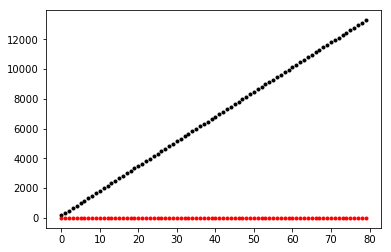

In [16]:
import pylab as pl
%matplotlib inline

pl.figure (1)
x=np.arange(80)
res=(k_exper_analysis(80))#Caso experimental para el algoritmo basado en Kruskal.
p=np.array(res[1])
t=np.array(res[0])*100
pl.plot(x, p, 'k.', t, 'r.')

In [17]:
def acct_p_rb(graph ,k,acct):
    x=k;acct.count()
    y=0;acct.count()
    nodes=graph['vertices'];acct.count()
    edges=graph['edges'];acct.count()
    conn = defaultdict( list );acct.count()
    
    for c,col,n1,n2 in edges:
        conn[ n1 ].append( (c, n1, n2,col) );acct.count()
        conn[ n2 ].append( (c, n2, n1,col) );acct.count()
 
    st = [];acct.count()
    used = set( nodes[ 0 ] );acct.count()
    usable_edges = conn[ nodes[0] ][:];acct.count()
    heapify( usable_edges );acct.count()
    try:
        while usable_edges:
            cost, n1, n2,col = heappop( usable_edges );acct.count()
            if n2 not in used and ((col=="B" and k>0) or col=="R"):
                used.add( n2 );acct.count()
                st.append( (cost,col, n1, n2) )  ;acct.count()   
                if col=="B":                    
                        k=k-1;acct.count()
                        y=y+1;acct.count()
                for e in conn[ n2 ]:
                    if e[ 2 ] not in used:
                        heappush( usable_edges, e );acct.count()
 
        p=0;acct.count()
        for x in st:#calcular peso para retornar
            peso,a,b,c = x;acct.count()
            p=p+int(peso);acct.count()

        return p, st;acct.count()
    except :      
        return set()
        
def p_exper_analysis(n):
    results = []
    tiempo=[]    
    acct = Counter()
    for i in range (3,n+3):
        ver=[]
        cont=0
        for i in range (n):
            ver.append(str(cont))#crea vértices del grafo
            cont=cont+1
            
        ed=set(); 
        for i in range (n):
            x=rnd.randint(0,10)
            y='B'
            if x<5:
                y='R' 
            ed.add((rnd.randint(0,10),y,rnd.randint(0,n-1),rnd.randint(0,n-1)))
            ed.add((rnd.randint(0,10),y,rnd.randint(0,n-1),rnd.randint(0,n-1)))
        
        graph = {
            'vertices': ver,
            'edges': ed
            }        

        acct.reset
        tic = time.clock()#get start time
        acct_p_rb(graph,rnd.randint(0,n-1),acct)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
        results.append(acct.steps)
        
    r= [tiempo, results]
    
    return r

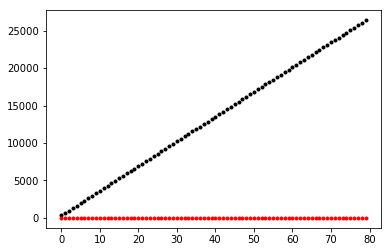

In [18]:
import pylab as pl
%matplotlib inline

pl.figure (1)
x=np.arange(80)
res=(p_exper_analysis(80))#Caso experimental para el algoritmo basado en Prim.
p=np.array(res[1])
t=np.array(res[0])*100
pl.plot(x, p, 'k.', t, 'r.')

Se puede ver para ambos algoritmos un tiempo de ejecución muy bajo incluso para grafos de gran tamaño (más de diez véertices), sin embargo, se puede notar un gran aumento de la cantidad de pasos requeridos para lograr el propósito de los algoritmos. A continuación se mostrará una comparación en una misma gráfica de ambas implementaciones.

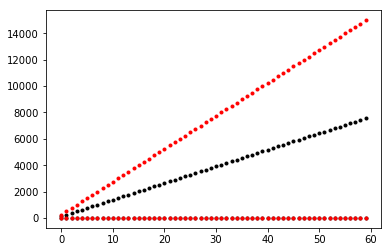

In [19]:
import pylab as pl
%matplotlib inline

pl.figure (1)
x=np.arange(60)
res=(k_exper_analysis(60))#Caso experimental para el algoritmo basado en Kruskal.
res2=(p_exper_analysis(60))#Caso experimental para el algoritmo basado en Prim.
p=np.array(res[1])
t=np.array(res[0])
p2=np.array(res2[1])
t2=np.array(res2[0])
pl.plot(x, p, 'k.', t, 'k.', p2, 'r.', t2, 'r.')#Prim es el caso rojo y Kruskal el negro.

Considerando que en la anterior gráfica, la cantidad de pasos requerida por la implementación basada en el algoritmo de Prim es la línea roja, y la cantidad de pasos requerida por la implementación basada en el algoritmo de Kruskal es la línea negra, posemos evidenciar una eficiencia considerablemente mayor en la primera implementación para solucionar el problema, la implementación basada en Kruskal.

$3.$ <b>La distancia de Hamming $dist(u,v)$ entre dos vectores binarios $v = (v_1 , . . . , v_n )$ $and$ $w = (w_1 , . . . , w_n )$ es el número de índices $k$ tal que $v_k \neq w_k$. Una pregunta fundamental en la teoría de la codificación es determinar el número: <br><br>
<center>$A(n, d) =$ $max$ $|$ {$S ⊂ {0, 1}$ $n$ $|$ $dist(u, v) ≥ d$ $for$ $all$ $distinct$ $u, v ∈ S$} $|$</center><br>
el máximo número de vectores binarios de longitud $n$ que uno puede encontrar tal que dos vectores diferentes tienen una distancia de Hamming $≥ d$.  Por ejemplo, $A(5, 4) = 2$. 
El grafo de Hamming $H(n, d) = (V, E)$ es el gráfo con $2$<sup>$n$</sup> vertices $V$ dados por cadenas binarias de longitud $n$. Nosotros tenemos $(u, v) ∈ E$ si y solo si $dist(u, v) ≥ d$. El número $A(n,d)$ coincide con el tamaño de un clique máximo en $H(n,d)$. Encuentre un algoritmo "eficiente"  para calcular el clique máximo en el grafo de Hamming (calcular el clique máximo es un problema NP-difícil).</b>

<h4>Librerias</h4>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rnd

<h4>Construcción del Grafo</h4>

La construcción del grafo de Hamming se hace de la siguiente manera:

1. <i>Elegir la dimensión:</i> Esto significa que se escoge la cantidad de dígitos de los números binarios ($n$).
2. <i>Sacar todas las posibles combinaciones:</i> Se debe sacar todas las posibles combinaciones de 1’s y 0’s (tabla de verdad) dentro de las dimensiones elegidas, es decir el total de combinaciones es $2^n$ (<u>Función "true_table"</u>).
3. <i>Elegir la distancia mínima de Hamming:</i> Se decide que distancia de Hamming mínima para hacer las conexiones se desea tener ($d$).
4. <i>Conectar los nodos:</i> Conectar los números binarios que tengan dicha distancia de Hamming (<u>Función "construct_graph"</u>).

In [35]:
def true_table(bits, acct): 
    vertices = []; acct.count()
    for i in range(pow(2,bits)): 
        acct.count()
        element=[0]*bits; acct.count() 
        for j in reversed(range(bits)): 
            acct.count()
            if i<=1: 
                acct.count()
                element[j]=i; acct.count() 
                if i==1:
                    acct.count()
                    i=0; acct.count() 
            else: 
                acct.count()
                element[j]=i%2; acct.count() 
                i=i//2; acct.count() 
        vertices.append(element); acct.count()
    return vertices

def hamming(binary_1, binary_2, acct):
    dif = 0; acct.count()
    size1 = len(binary_1); acct.count()
    size2 = len(binary_2); acct.count()
    for i in range(0,size1):
        acct.count()
        if binary_1[i] != binary_2[i]:
            acct.count()
            dif += 1; acct.count()
    return dif

def graph_reltion(n, d, acct):
    positions = []; acct.count()
    size = 2**n; acct.count()
    vertices = true_table(n, acct)
    
    for i in range(0, size):
        acct.count()
        for j in range(i+1, size):
            acct.count()
            dif = hamming(vertices[i],vertices[j], acct)
            
            if dif >= d:
                acct.count()
                aux = [i,j]; acct.count()
                positions.append(aux); acct.count()
                
    return positions

def construct_graph(n, d, acct):
    graph = np.zeros((2**n,2**n), dtype=np.int); acct.count()
    
    positions = graph_reltion(n, d, acct)
    count = 0; acct.count()
    for i in range(0, len(positions)):
        acct.count()
        pos1 = positions[i][0]; acct.count()
        pos2 = positions[i][1]; acct.count()
        
        graph[pos1, pos2] = 1; acct.count()
        graph[pos2, pos1] = 1; acct.count()
        
        count +=1; acct.count()
    return graph, count

<h4>Clique Máximo</h4>

Para hallar el clique máximo se utilizó el algoritmo de <i>Bron Kerbosch</i> el cual es un algoritmo recursivo backtracking, su complejidad es de $2^v$. Este algoritmo tiene los siguientes parámetros:
<br>P: vértices.</br>
<br>R: Algunos de los vértices de P ($P∪X$).</br>
<br>X: Ninguno de los vértices de P.</br>
<br>Donde P se inicializa con todos los vértices que tiene el grafo, R y X vacío.</br>
<br>En cada llamada recursiva el algoritmo revisa los vértices de P en donde R se añade a los vértices(v), P y X sean los vecinos de N(v) para hacer llamada recursiva. Y después se elimina el vértice(v) de la lista P y se añade a la lista X para excluirlo.

In [39]:
def N(graph, vertex, acct):
    return [i for i, n_v in enumerate(graph[vertex]) if n_v]

def bron_kerbosch(r, p, x, data, graph, acct):
    if len(p) == 0 and len(x) == 0:
        acct.count()
        data.append(r); acct.count()
    for vertex in p[:]:
        acct.count()
        r_new = r[:]; acct.count()
        r_new.append(vertex); acct.count()
        p_new = [val for val in p if val in N(graph, vertex, acct)]
        x_new = [val for val in x if val in N(graph, vertex, acct)]
        bron_kerbosch(r_new, p_new, x_new, data, graph, acct)
        p.remove(vertex); acct.count()
        x.append(vertex); acct.count()

def maximum_clique(graph, n, acct):
    r = []; acct.count()
    x = []; acct.count()
    data = []; acct.count()
    p = range(2**n); acct.count()
    bron_kerbosch(r, p, x, data, graph, acct)
    vertices = true_table(n, acct)
    
    clique_list = []; acct.count()
    for i in range(0, len(data)):
        acct.count()
        vertices_clique = []; acct.count()
        for j in range(0, len(data[i])):
            acct.count()
            pos = data[i][j]; acct.count()
            vertex = "".join(str(x) for x in vertices[pos])
            vertices_clique.append(vertex); acct.count()
        clique_list.append(vertices_clique); acct.count()
    return clique_list

<h4>Dibujar Grafo</h4>

In [23]:
def draw_graph(graph):
    G = nx.from_numpy_matrix(np.array(graph), create_using=nx.MultiDiGraph())
    pos = nx.circular_layout(G)
    nx.draw_circular(G)
    labels = {i : int(bin(i)[2:]) for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    plt.show()

<h4>Analisis del Tiempo</h4>

In [109]:
def analys_cliqueMax(num):
    steps = []
    timeP = []
    acct = Counter()
    for i in range(1, num):
        #n = rnd.randint(1,num)
        d = rnd.randint(1,i)     
        acct.reset()     
        tic = time.clock()
        graph, egh_num = construct_graph(i, d, acct)
        maximum_clique(graph, i, acct)
        toc = time.clock()
        
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP]
    return results

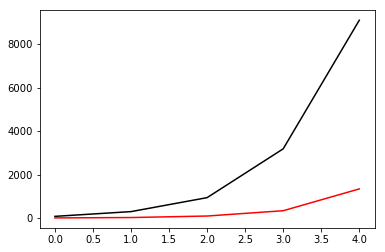

In [110]:
pl.clf()
x = np.arange(5)
res = analys_cliqueMax(6)
p = np.array(res[0])               #Negro -> Cantidad de procesos
t = np.array(res[1]) * 100000      #Rojo  -> Tiempo de ejecución

pl.plot(x, p, 'k', t, 'r')

<h4>Archivo de Texto</h4>

In [24]:
# NOTA: La primera línea corresponde a la cantidad de nodos (n)
#       La segunda línea corresponde a la distancia de Hamming (d)
def open_text(name):
    myfile = open(name)
    mytext = []
    for line in myfile:
        mytext.append(line)
    myfile.close()
    return mytext

In [25]:
def save_text(name, vertices, graph, clque_list):
    file = open(name+'.txt', 'w') 
    file.write('VERTICES:'+'\n') 
    file.write(('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in vertices]))+'\n')
    file.write('GRAFO EN MATRIZ:'+'\n') 
    file.write('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in graph])+'\n')
    file.write('CLIQUE MACIMO:'+'\n')     
    file.write('\n'.join([' '.join(['{:4}'.format(item) for item in row]) 
      for row in clique_list])+'\n')
    
    file.close() 

<h4>Solución</h4>

In [33]:
acct = Counter()
mytext = open_text('input_Clique.txt')
n = int (mytext[0])
d = int (mytext[1])

graph, edg_num = construct_graph(n, d, acct)
vertices = true_table(n, acct)
clique_list = maximum_clique(graph, n, acct)

Grafo:


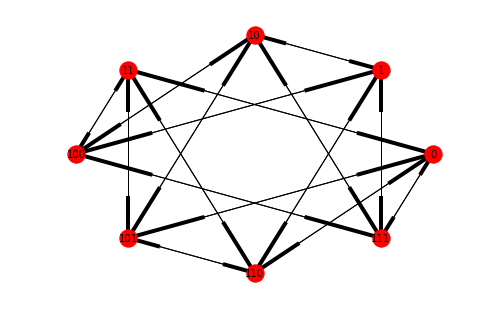

In [34]:
print "Grafo:"
draw_graph(graph)

In [ ]:
save_text('output_Clique', vertices, graph, clique_list)

<h4>Referencias</h4>

http://www.solveet.com/exercises/Tabla-de-verdad-en-Binario/339/solution-2140

http://stackoverflow.com/questions/13904636/implementing-bron-kerbosch-algorithm-in-python

https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm

Diapositiva "Clase 2 - Localizacion en redes.pptx" (Anexo)